<a href="https://colab.research.google.com/github/kaanguney/GamesAI/blob/master/CurrentVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mounting drive 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd "/content/drive/My Drive"

/content/drive/My Drive


In [0]:
import sys as py_info # interact with the host system
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.cm as cm # color maps 
%matplotlib inline 
# use the backend for Jupyter
import struct

In [0]:
def read_and_convert():
    with open('./train-labels-idx1-ubyte', 'rb') as binary_file: # process the labels for the training sample
        binary_file.seek(0)  # return to the beginning of the file
        # Reading first 4 bytes to extract the magic number
        magic_number = binary_file.read(4)
        # unpacking couple_bytes as a 4byte signed integer with Big-endian Byte order
        train_magic_number = struct.unpack('>i',magic_number) 
        # print(magic_number)
        # unpacking next 4 bytes to extract the number of items
        nitems = binary_file.read(4)
        nitems = struct.unpack('>i',nitems)
        # print(nitems)
        # Next, we use np.fromfile to create an array from data in a binary file(var)
        train_labels = np.fromfile(binary_file, np.uint8) # labels are an unsigned byte --> np.uint8 
        # print (train_labels)
    with open('./train-images-idx3-ubyte', 'rb') as binary_file: # processing training images
        # reading the first 16 bytes: 
        # 4bytes: magic_number | 4bytes: # of images | 4bites: # of rows | 4bytes: # of cols
        data = binary_file.read(16) 
        magic_number, ntrimages, rows, cols = struct.unpack('>iiii', data)
        # print (magic_number, ntrimages, rows, cols)
        # extracting images and storing them into a numpy array (note that each image is stored as a vector, so we need to reshape it in the matrix form)
        train_images = np.fromfile(binary_file, np.uint8).reshape(ntrimages, rows, cols)
    with open('./t10k-labels-idx1-ubyte', 'rb') as binary_file:
        data = binary_file.read(8)
        magic_number, ntelabels = struct.unpack('>ii',data)
        # print (magic_number, ntelabels)
        test_labels = np.fromfile(binary_file, np.uint8) # reading the labels
    with open('./t10k-images-idx3-ubyte', 'rb') as binary_file:
        data = binary_file.read(16)
        magic_number, nteimages, rows, cols = struct.unpack('>iiii', data)
        # print (magic_number, nteimages, rows, cols)
        test_images = np.fromfile(binary_file, np.uint8).reshape(nteimages, rows, cols)
    return train_images, train_labels, ntrimages, test_images, test_labels, nteimages

In [0]:
train_images, train_labels, ntrimages, test_images, test_labels, nteimages = read_and_convert() # call here 

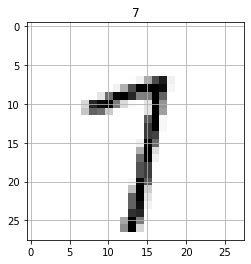

In [7]:
plt.imshow(train_images[42], cmap=cm.Greys) # print the 42nd datapoint, just to see if the code above works
plt.title(train_labels[42])
plt.grid()

In [0]:
# label = actual, test-train = imput samples

In [9]:
# check if the sample sizes match 
# so that equal amounts of in-out's are made in the perceptron
print("Training sample size is:",train_images.shape,"\nTesting sample size is:",test_images.shape)

Training sample size is: (60000, 28, 28) 
Testing sample size is: (10000, 28, 28)


In [10]:
# creating an input vector of size 10 * 784 because 28*28 = 784
colsize = 784
train_images = train_images.reshape(60000, 784)
test_images = test_images.reshape(10000, 784)
# print to see if correctly converted
print("Updated training sample size is:",train_images.shape,"\nUpdated testing sample size is:",test_images.shape)

Updated training sample size is: (60000, 784) 
Updated testing sample size is: (10000, 784)


In [11]:
# now the samples are updated...
# if needed, convert to categorical data
print("Train dtype:",train_images.dtype, " Test dtype:",test_images.dtype)
# convert...

Train dtype: uint8  Test dtype: uint8


In [12]:
# one-hot encoding begin...
# use soft-max for the output neuron...

# import, necessary for Perceptron
from tensorflow import keras 
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras import initializers
from tensorflow.keras.regularizers import l2 # sum of squared weights 
import random

In [0]:
sgd = keras.optimizers.SGD(learning_rate=1e-3) # define the stochastic gradient 

In [0]:
num_classes = 10 # there are ten classes-> 0,1,2,3,4..........9
train_labels = keras.utils.to_categorical(train_labels, num_classes) # y_train
test_labels = keras.utils.to_categorical(test_labels, num_classes) # y_test

# they are one-hot encoded now...

In [15]:
# check the converted label vector sizes 
print("Train label size:",train_labels.shape[0],"\nTest label size:",test_labels.shape[0])

Train label size: 60000 
Test label size: 10000


In [0]:
import math 
import time # use GPU process time

In [0]:
import tensorflow as tf # for the function implementation below
tf.enable_eager_execution()

In [0]:
# in this version; 

# add iteration count for each test result -> implemented below
# get average for both delay and iteration -> implemented below
# stopping condition is passed into evaluate() as parameter -> implemented below

# perform 100 times for a single testing batch and get the average 
avg_elapsed = 0 
elapsed_total = 0
avg_iter = 0
iter_total = 0
epochs = 1

In [0]:
# for model loss 
iterationArr = []
lossArr = [] 

In [0]:
def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(784,), kernel_initializer = initializers.RandomUniform(minval=0.5*(10**3), maxval=1.5*(10**3), seed=42), kernel_regularizer=l2(0.01))) # sigmoid works best for the input layer
    
    for i in layer_sizes[1:]: # after the input layer 
        model.add(Dense(units=i, activation='relu',bias_initializer=initializers.Constant(0.1),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))) # relu works best in hidden layers 
    
    # now, for the output layer 
    model.add(Dense(units=10, activation='softmax',bias_initializer=initializers.Constant(0.1),bias_regularizer=l2(0.01)))
    
    return model


def evaluate(model, batch_size, epochs, condition, iteration, iterationArr, lossArr):
    # model.summary() 
    # line above commented because causes too much crowd in the output
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['categorical_crossentropy'])
    
    train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
    train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)
    
    prev_loss = -42 # dummy
    stop = -42 # dummy

    for epoch in range(epochs):
    
      # Iterate over the batches of the dataset.
      for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

        # Open a GradientTape to record the operations run
        # during the forward pass, which enables autodifferentiation.(shuffling in a sense)
        with tf.GradientTape() as tape:

          # Run the forward pass of the layer.
          # The operations that the layer applies
          # to its inputs are going to be recorded
          # on the GradientTape.
          logits = model(x_batch_train)  # Logits for the batch (probability mapping function)
          
          # Compute the loss value for this minibatch.
          loss_fn = keras.losses.CategoricalCrossentropy()
          loss_value = loss_fn(y_batch_train, logits)
          lossArr.append(loss_value)
          
        stop = abs(loss_value-prev_loss)
        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient(loss_value, model.trainable_weights)
        # Instantiate an optimizer.
        optimizer = keras.optimizers.SGD(learning_rate=1e-3)
        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # calculate iteration count
        iteration = (step + 1) * batch_size
        iterationArr.append(iteration)

        if(stop < condition):
            # strict stoppage
            print('Training loss for the batch: %s' % float(loss_value))
            print('Updates seen so far(including current epoch): %s ' % (iteration))
            return iteration, iterationArr, lossArr
        else:
          prev_loss = loss_value # connect here

### _Graphs on the Model (to be implemented)_

> ***1)loss vs iteration***

> ***2)loss vs epochs (more than 1)***

> ***3)mini-batch count vs iteration***

> ***4)neuron count vs iteration***

> ***5)layer count vs iteration***

> ***6)target error vs iteration***

> ***7)correlation vs iteration***

> ***8)delay vs iteration*** _(plot on the same grid with ***(1)*** )_

### _Only Graphical Tests w/o taking the Average of 100 Sample Runs_

### ***This will be a 3 run test !!!***

> ***1)Loss vs Iteration*** (cell below)

In [0]:
test1x,test1y = [],[]
test2x,test2y = [],[]
test3x,test3y = [],[]

In [22]:
# set epoch count as 1, every worker eventually contributes to the parameter server
# set hidden layer count as fixed 3
# structure is input_layer -> hiddenlayer1 -> hiddenlayer2 -> hiddenlayer3 -> outputlayer -> output
test1 = create_dense([10,10,5]) # first expand, then maintain, then contract
condition = 0.0001
iteration = 0 # dummy val
delay = 0  # dummy val

# test 1 
# get loss,iteration
iteration,test1x,test1y = evaluate(test1,5,epochs,condition,iteration,iterationArr,lossArr) 
# reset
iterationArr, lossArr = [],[]

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Training loss for the batch: 2.3138482570648193
Updates seen so far(including current epoch): 2380 


In [23]:
# test 2 
iteration,test2x,test2y = evaluate(test1,5,epochs,condition,iteration,iterationArr,lossArr)
# reset
iterationArr, lossArr = [],[]

Training loss for the batch: 2.3073477745056152
Updates seen so far(including current epoch): 455 


In [24]:
# test 3
iteration,test3x,test3y = evaluate(test1,5,epochs,condition,iteration,iterationArr,lossArr)
# reset
iterationArr, lossArr = [],[]

Training loss for the batch: 2.301051616668701
Updates seen so far(including current epoch): 905 


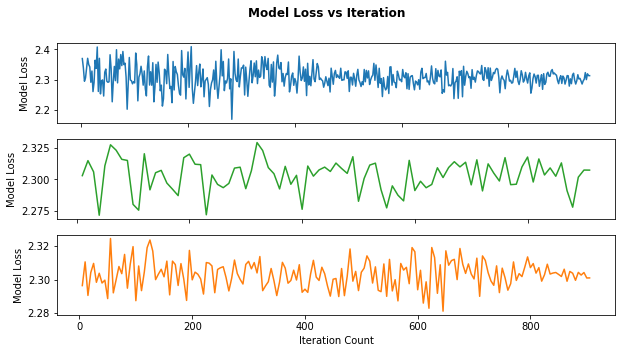

In [25]:
# plotting them separately is not really intuitive, therefore all 3 tests will be combined in a graph in the next code cell

fig,ax = plt.subplots(3, figsize = (10,5))

fig.suptitle("Model Loss vs Iteration", fontweight = "bold")

# first
ax[0].set(xlabel = "Iteration Count", ylabel = "Model Loss")
ax[0].plot(test1x,test1y)

# second 
ax[1].set(xlabel = "Iteration Count", ylabel = "Model Loss")
ax[1].plot(test2x,test2y,"tab:green")

# third
ax[2].set(xlabel = "Iteration Count", ylabel = "Model Loss")
ax[2].plot(test3x,test3y,"tab:orange")

# label the outers only 
for axis in ax:
  axis.label_outer()

plt.show()

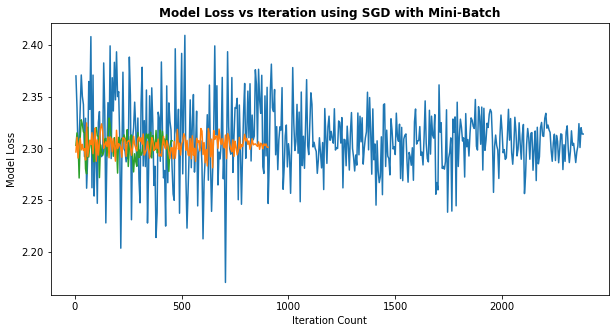

In [27]:
# under epoch = 1
# performed 3 single run tests
# model loss vs iteration
fig,ax = plt.subplots(1, figsize = (10,5))

plt.title("Model Loss vs Iteration using SGD with Mini-Batch", fontweight = "bold")
plt.plot(test1x,test1y,"tab:blue")
plt.xlabel("Iteration Count")
plt.ylabel("Model Loss")
plt.plot(test2x,test2y,"tab:green")
plt.plot(test3x,test3y,"tab:orange")

plt.show()

In [28]:
# average of sample of 3 is:
print("Average update(iteration) count for the algorithm of sample_run_size = 3 is {}.".format(math.ceil((955 + 455 + 2380)/3)))

Average update(iteration) count for the algorithm of sample_run_size = 3 is 1264.


In [0]:
# now, let's generalize our intuition to plot for the whole dataset's loss vs iteration
# modify the evaluate() so that it runs on the maximum iterative version
# name that function accordingly

In [0]:
def lossIteration(model, batch_size, epochs, condition, iteration, iterationArr, lossArr):
    # model.summary() 
    # line above commented because causes too much crowd in the output
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['categorical_crossentropy'])
    
    train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
    train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

    for epoch in range(epochs):
    
      # Iterate over the batches of the dataset.
      for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

        # Open a GradientTape to record the operations run
        # during the forward pass, which enables autodifferentiation.(shuffling in a sense)
        with tf.GradientTape() as tape:

          # Run the forward pass of the layer.
          # The operations that the layer applies
          # to its inputs are going to be recorded
          # on the GradientTape.
          logits = model(x_batch_train)  # Logits for the batch (probability mapping function)
          
          # Compute the loss value for this minibatch.
          loss_fn = keras.losses.CategoricalCrossentropy()
          loss_value = loss_fn(y_batch_train, logits)
          lossArr.append(loss_value)
        
        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient(loss_value, model.trainable_weights)
        # Instantiate an optimizer.
        optimizer = keras.optimizers.SGD(learning_rate=1e-3)
        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # calculate iteration count
        iteration = (step + 1) * batch_size
        iterationArr.append(iteration)

    return iteration, iterationArr, lossArr

In [65]:
# set epoch count as 1, every worker eventually contributes to the parameter server
# set hidden layer count as fixed 3
# structure is input_layer -> hiddenlayer1 -> hiddenlayer2 -> hiddenlayer3 -> outputlayer -> output
test1 = create_dense([10,10,5]) # first expand, then maintain, then contract
condition = 0.0001
iteration = 0 # dummy val
delay = 0  # dummy val
execution = 0 
counter = 0 

# store the sum of 5 model loss values  
# 5 instead of 100 because of computational limits on this computer 
sumofLoss,iterationArr,lossArr = [],[],[]


for k in range(5): # perform 5 times
  start_time = time.process_time()
  print("\nExecution number: %s" % (k + 1))
  iteration,iterationArr,lossArr = lossIteration(test1,5,epochs,condition,iteration,iterationArr,lossArr) # return type is not constant, could change for different tests
  lenLoss = len(lossArr)
  if counter == 0:
    # fill sumofLoss for the first & last time
    for k in range(lenLoss):
      sumofLoss.append(lossArr[k])
  else: 
    # add to the existing loss values here
    for k in range(lenLoss):
      temp = sumofLoss[k] + lossArr[k]
      sumofLoss[k] = temp
  counter += 1
  # reset
  lossArr = []
  iterationArr = []
  iter_total += iteration
  end_time = time.process_time() 
  elapsed = end_time - start_time
elapsed_total += elapsed
avg_elapsed = elapsed_total / 5
avg_iter = math.ceil(iter_total / 5)
print("\nAverage iteration count is %s." % avg_iter)
print("\nAverage delay is: %s" % avg_elapsed + " seconds.")

elapsed_total = 0 # reset
iter_total = 0  # reset


Execution number: 1

Execution number: 2

Execution number: 3

Execution number: 4

Execution number: 5

Average iteration count is 60000.

Average delay is: 39.962491431599936 seconds.


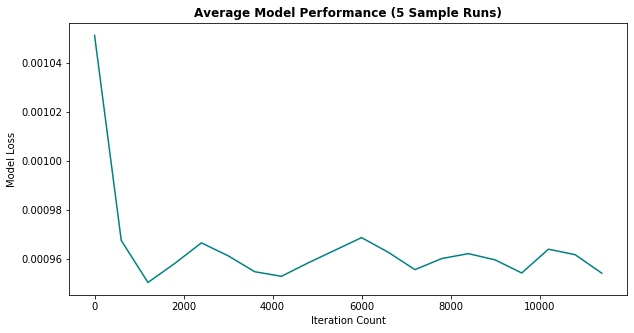

In [105]:
# now, iterationArr & lossArr is generated from the same model for 5 runs 
# there are so many data points, we need to create a sample for the plot by taking averages
fig, ax = plt.subplots(1, figsize = (10,5))
ax.plot(range(0,len(sumofLoss),600),[sumofLoss[i]/len(sumofLoss) for i in range(0,len(sumofLoss),600)], color = "#008080")
ax.set_title("Average Model Performance (5 Sample Runs)",fontweight = "bold")
ax.set(xlabel = "Iteration Count", ylabel = "Model Loss")
plt.show()